<a href="https://colab.research.google.com/github/arad1367/WAC/blob/main/session_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning examples
* Artificial neural networks (ANN), link: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.09622&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
* Convolutional neural network (CNN), link: https://poloclub.github.io/cnn-explainer/
* Embeded Projector, link: https://projector.tensorflow.org/


### Deep Learning
* What is deep learning?
* Introduction to tensors
* Convert an array to tensor
* A regression problem with deep learning
  - Import data
  - Preprocessing
  - Features and target variables
  - Split the data and make it visual
  - Create, compile and fit the model
  - Model summary
  - Model visualisation
  - Make prediction
  - Model evaluation
  - Loss curve plot


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from tensorflow.keras.utils import plot_model

In [2]:
print(f'The tensorflow version in colab is: {tf.__version__}')

The tensorflow version in colab is: 2.13.0


### 1. What is deep learning?
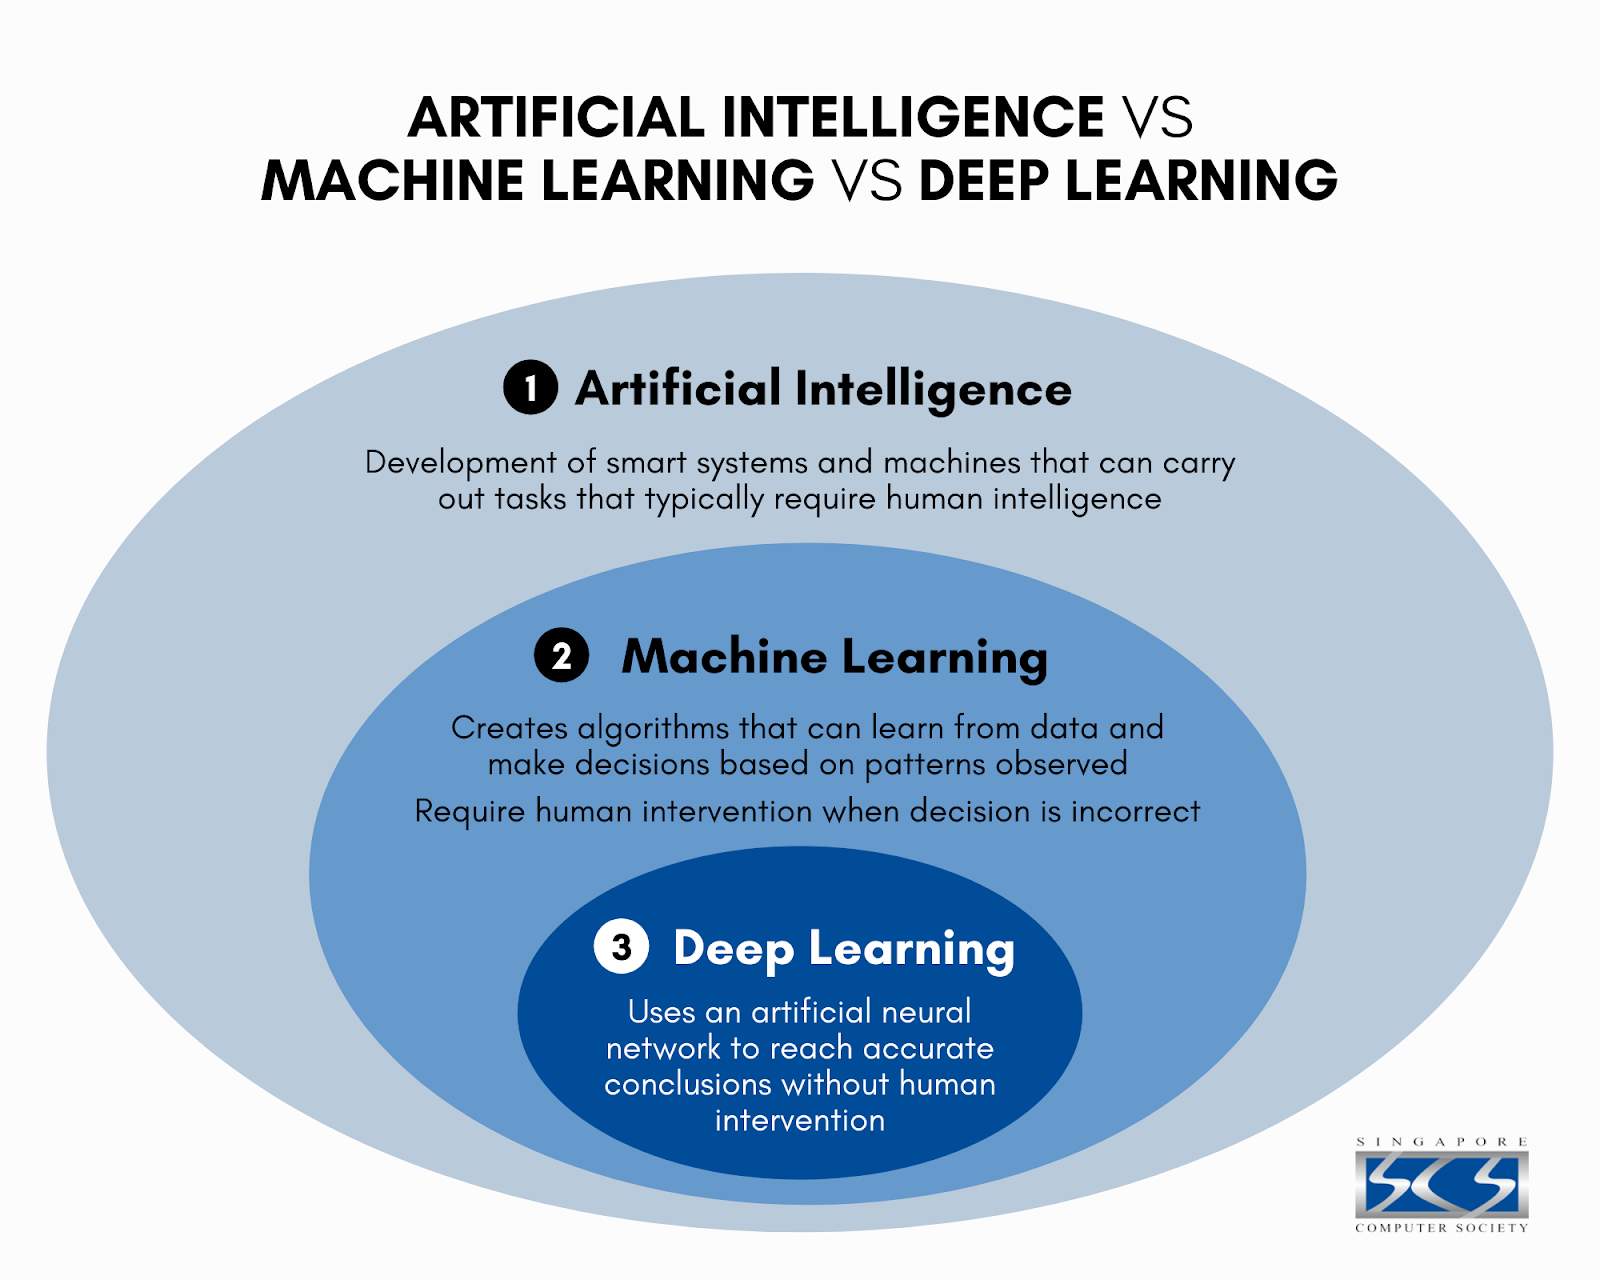

### 1. What is tensor?

In [5]:
### Define a 2D and 3D tensors
array_2D = tf.constant([
    [1, 3],
    [10, 10]
], dtype=tf.float32)

array_2D, array_2D.ndim

array_3D = tf.constant([[
    [1, 1, 2, 3],
    [4, 4, 5, 7]
]], dtype=tf.float32)

array_3D

<tf.Tensor: shape=(1, 2, 4), dtype=float32, numpy=
array([[[1., 1., 2., 3.],
        [4., 4., 5., 7.]]], dtype=float32)>

In [6]:
# Random tensor
random_tensor = tf.random.normal(shape=(5, 5), dtype=tf.float32)
random_tensor

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-1.9229275 , -0.39449996,  1.3709233 ,  1.6027424 ,  1.0019605 ],
       [ 0.44729936, -0.8079114 ,  0.6230124 , -0.62075025, -0.71771574],
       [-0.8428772 ,  1.619748  ,  0.19809967,  1.6432781 ,  0.7361403 ],
       [-0.61373353, -0.3104936 , -0.21304248,  1.3846089 , -0.7927964 ],
       [-1.9977318 ,  0.27041435,  0.31675667,  1.113036  ,  0.24388999]],
      dtype=float32)>

In [8]:
# How can we shuffle a tensor
non_shuffle_tensor = tf.constant(np.arange(1, 100, 10), dtype=tf.float32)
print(f"The non_shuffle_tensor is: {non_shuffle_tensor}")

shuffled_tensor = tf.random.shuffle(non_shuffle_tensor)
print(f"The shuffled tensor is: {shuffled_tensor}")

The non_shuffle_tensor is: [ 1. 11. 21. 31. 41. 51. 61. 71. 81. 91.]
The shuffled tensor is: [21. 41. 81. 71. 91.  1. 51. 11. 61. 31.]


### 2. Convert an array to tensor

In [10]:
simple_array = np.linspace(1, 100, 50)

convert_to_tensor = tf.convert_to_tensor(simple_array)
convert_to_tensor

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
         9.08163265,  11.10204082,  13.12244898,  15.14285714,
        17.16326531,  19.18367347,  21.20408163,  23.2244898 ,
        25.24489796,  27.26530612,  29.28571429,  31.30612245,
        33.32653061,  35.34693878,  37.36734694,  39.3877551 ,
        41.40816327,  43.42857143,  45.44897959,  47.46938776,
        49.48979592,  51.51020408,  53.53061224,  55.55102041,
        57.57142857,  59.59183673,  61.6122449 ,  63.63265306,
        65.65306122,  67.67346939,  69.69387755,  71.71428571,
        73.73469388,  75.75510204,  77.7755102 ,  79.79591837,
        81.81632653,  83.83673469,  85.85714286,  87.87755102,
        89.89795918,  91.91836735,  93.93877551,  95.95918367,
        97.97959184, 100.        ])>

### 3. A regression problem with deep learning

In [12]:
data_path = '/content/lettuce.csv'

df = pd.read_csv(data_path, encoding='unicode_escape')

df.head(6)

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,33.4,53,582,6.4,1
1,1,33.5,53,451,6.1,2
2,1,33.4,59,678,6.4,3
3,1,33.4,68,420,6.4,4
4,1,33.4,74,637,6.5,5
5,1,32.3,77,478,6.8,6


In [13]:
df.tail()

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
3164,70,19.4,72,475,6.1,42
3165,70,22.5,80,668,6.7,43
3166,70,22.5,62,476,6.6,44
3167,70,24.6,79,621,6.0,45
3168,70,22.6,69,521,6.5,46


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Temperature (°C)  3169 non-null   float64
 2   Humidity (%)      3169 non-null   int64  
 3   TDS Value (ppm)   3169 non-null   int64  
 4   pH Level          3169 non-null   float64
 5   Growth Days       3169 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 148.7 KB


In [15]:
df.describe()

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,35.441780,28.142222,64.873462,598.045440,6.399211,23.140107
std,20.243433,4.670521,8.988985,115.713047,0.234418,13.075415
min,1.000000,18.000000,50.000000,400.000000,6.000000,1.000000
25%,18.000000,23.600000,57.000000,498.000000,6.200000,12.000000
50%,35.000000,30.200000,65.000000,593.000000,6.400000,23.000000
75%,53.000000,31.500000,73.000000,699.000000,6.600000,34.000000
max,70.000000,33.500000,80.000000,800.000000,6.800000,48.000000


### 3.1. Preprocessing step

In [17]:
### Missing value
df.isna().sum()

df.isna()

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3164,False,False,False,False,False,False
3165,False,False,False,False,False,False
3166,False,False,False,False,False,False
3167,False,False,False,False,False,False


### 3.2. Features(x) and target variable (y)

In [18]:
x = df.drop('Growth Days', axis=1)
y = df['Growth Days']

x[:10]

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level
0,1,33.4,53,582,6.4
1,1,33.5,53,451,6.1
2,1,33.4,59,678,6.4
3,1,33.4,68,420,6.4
4,1,33.4,74,637,6.5
5,1,32.3,77,478,6.8
6,1,32.3,75,682,6.0
7,1,22.7,63,576,6.3
8,1,31.9,69,662,6.1
9,1,30.2,59,607,6.2


### 3.3. Split the data (train, validation and test datasets)

In [19]:
train_bound = math.ceil(0.7 * len(df))
validation_bound = train_bound + math.ceil(0.15 * len(df))

x_train, y_train = x[:train_bound], y[:train_bound]
x_valid, y_valid = x[train_bound:validation_bound], y[train_bound:validation_bound]
x_test, y_test = x[validation_bound:], y[validation_bound:]

len(x_train), len(y_train), len(x_valid), len(y_valid), len(x_test), len(y_test)

(2219, 2219, 476, 476, 474, 474)

### 3.4. Visualisation for train, validation and test datasets

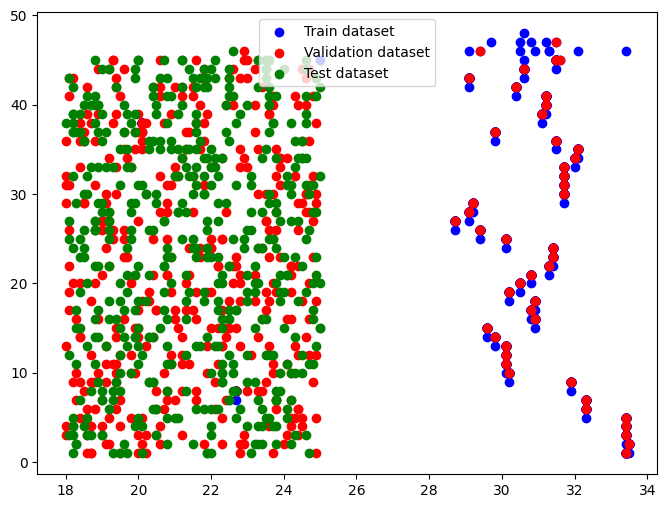

In [22]:
plt.figure(figsize=(8, 6))

plt.scatter(x_train['Temperature (°C)'], y_train, c='b', label="Train dataset")
plt.scatter(x_valid['Temperature (°C)'], y_valid, c='r', label="Validation dataset")
plt.scatter(x_test['Temperature (°C)'], y_test, c='g', label="Test dataset")

plt.legend()
plt.show();

### 3.5. Create, compile and fit model

In [27]:
# Create a model Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer1"),
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer2"),
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer3"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model1")

# Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

# Fit the model
history1 = model.fit(x_train, y_train,
                     validation_data=(x_valid, y_valid),
                     epochs=50)

Epoch 1/50
70/70 [==============================] - 1s 6ms/step - loss: 12.1118 - mae: 12.1118 - val_loss: 11.9862 - val_mae: 11.9862
Epoch 2/50
70/70 [==============================] - 0s 3ms/step - loss: 11.8670 - mae: 11.8670 - val_loss: 11.6315 - val_mae: 11.6315
Epoch 3/50
70/70 [==============================] - 0s 3ms/step - loss: 11.8011 - mae: 11.8011 - val_loss: 11.5651 - val_mae: 11.5651
Epoch 4/50
70/70 [==============================] - 0s 3ms/step - loss: 11.8382 - mae: 11.8382 - val_loss: 11.5570 - val_mae: 11.5570
Epoch 5/50
70/70 [==============================] - 0s 3ms/step - loss: 11.8306 - mae: 11.8306 - val_loss: 11.5814 - val_mae: 11.5814
Epoch 6/50
70/70 [==============================] - 0s 3ms/step - loss: 11.7132 - mae: 11.7132 - val_loss: 11.5451 - val_mae: 11.5451
Epoch 7/50
70/70 [==============================] - 0s 3ms/step - loss: 11.7289 - mae: 11.7289 - val_loss: 11.7375 - val_mae: 11.7375
Epoch 8/50
70/70 [==============================] - 0s 4ms/ste

### 3.6. Summary of model

In [28]:
model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 10)                60        
                                                                 
 hidden_layer2 (Dense)       (None, 10)                110       
                                                                 
 hidden_layer3 (Dense)       (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 291 (1.14 KB)
Trainable params: 291 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3.7. Visualiasation of model

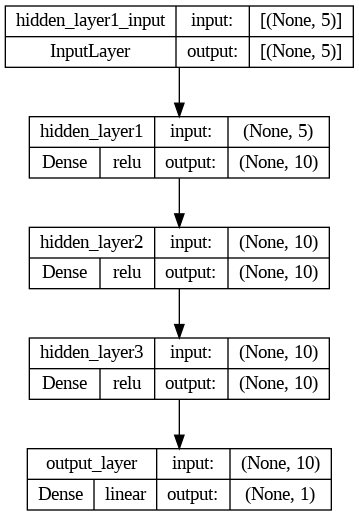

In [30]:
plot_model(model=model,
           show_shapes=True,
           show_layer_activations=True)

### 3.8. Make some prediction

In [31]:
y_preds = model.predict(x_test)
y_preds[:20]

15/15 [==============================] - 0s 5ms/step


array([[27.034548],
       [23.244757],
       [26.295795],
       [21.340134],
       [23.94054 ],
       [25.044386],
       [25.130236],
       [21.423624],
       [24.480846],
       [24.147314],
       [27.879639],
       [22.605572],
       [24.032928],
       [26.547783],
       [26.068766],
       [26.74482 ],
       [24.58758 ],
       [25.435442],
       [21.599106],
       [28.23292 ]], dtype=float32)

### 3.9. Evaluate our model

In [32]:
model.evaluate(x_test, y_test)

15/15 [==============================] - 0s 6ms/step - loss: 11.2133 - mae: 11.2133


[11.213339805603027, 11.213339805603027]

### 3.10. Loss curve plot

Text(0, 0.5, 'loss')

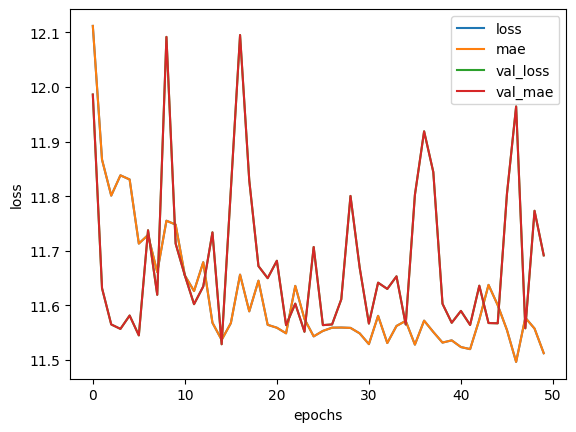

In [33]:
pd.DataFrame(history1.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')